**WHAT IS THE GOAL OF THIS EXERCISE**

*Premise: Microsoft wants to start a movie studio and needs to know how to enter the market.*

*Question: What movies/genres are doing the best at the box office?

*Question: How does this information help Microsoft?


**IMPORTING THE DATA FROM THE FOLDER**

In [1]:
!ls data #Shows the files in the datafolder

bomMovieGross.csv    imdbTitleBasics.csv  imdbTitleRatings.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
bomMovieGrossdf = pd.read_csv('data/bomMovieGross.csv')

In [4]:
bomMovieGrossdf

,Unnamed: 0,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...,...
3382,3382,The Quake,Magn.,6200.0,NaN,2018
3383,3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,3384,El Pacto,Sony,2500.0,NaN,2018
3385,3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
imdbTitleBasicsdf = pd.read_csv('data/imdbTitleBasics.csv')

In [6]:
imdbTitleBasicsdf

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...
146139,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [7]:
imdbTitleRatingsdf = pd.read_csv('data/imdbTitleRatings.csv')

In [8]:
imdbTitleRatingsdf

,Unnamed: 0,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21
...,...,...,...,...
73851,73851,tt9805820,8.1,25
73852,73852,tt9844256,7.5,24
73853,73853,tt9851050,4.7,14
73854,73854,tt9886934,7.0,5


**EXPERIMENTING WITH THE DATA!**

In [9]:
# pd.merge (how= 'left') makes a left join on a common series. 
imdbdatadf = pd.merge(imdbTitleBasicsdf, imdbTitleRatingsdf, on = 'tconst' , how = 'left')

In [10]:
imdbdatadf.head(10)

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",2223.0,6.1,13.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0
5,5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN,NaN
6,6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",55676.0,4.1,32.0
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",30166.0,8.1,263.0
8,8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",NaN,NaN,NaN
9,9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,NaN,NaN,NaN


In [11]:
# Removed extra 'unnamed' rows created by the join.
imdbdatadf.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1, inplace = True)

In [12]:
imdbdatadf

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


In [13]:
# Dropped NaNs in dataset to more easily make graphs.
imdbdatadf.dropna( inplace = True)

In [14]:
imdbdatadf

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


In [23]:
# Removed removed rows containing documentaries as they are not often major box office movies.
imdbdatadf = imdbdatadf[~imdbdatadf.genres.str.contains('Documentary')]

In [24]:
imdbdatadf

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146070,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600.0
146094,tt9908960,Pliusas,Pliusas,2018,90.0,Comedy,4.2,13.0
146103,tt9910502,Hayatta Olmaz,Hayatta Olmaz,2019,97.0,Comedy,7.0,9.0
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0


In [34]:
# Figuring out the code to show the average rating by genre.
imdbdatadf[imdbdatadf['genres'].str.contains('Action')]      

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0
27,tt0276568,To Chase a Million,To Chase a Million,2018,97.0,"Action,Drama",7.4,5.0
38,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378.0
56,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action,6.4,16.0
...,...,...,...,...,...,...,...,...
145475,tt9822864,Saat Zaman,Saat Zaman,2019,98.0,"Action,Adventure,Drama",4.0,12.0
145492,tt9826484,Trinity Seven: The Movie 2 - Heavens Library &...,Trinity Seven: Heavens Library & Crimson Lord,2019,63.0,"Action,Animation,Comedy",6.7,37.0
145568,tt9839040,Murphy's Law: Ghanoone Morfi,Murphy's Law: Ghanoone Morfi,2019,90.0,"Action,Comedy",4.9,51.0
145600,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",7.5,24.0


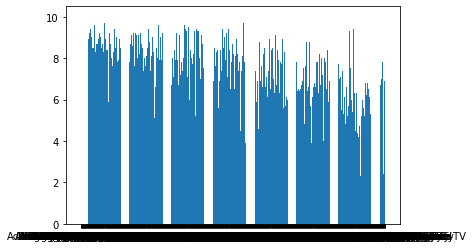

In [17]:
x = imdbdatadf['genres']
y = imdbdatadf['averagerating']

genrevsrating = plt.bar(x, y , label = 'genrevsrating')
plt.show()

In [35]:
imdbdatadf[imdbdatadf['genres'].str.contains('Action')]['averagerating'].mean()

5.731418753068237

In [36]:
imdbdatadf[imdbdatadf['genres'].str.contains('Comedy')]['averagerating'].mean()

5.970162313806693

In [37]:
imdbdatadf[imdbdatadf['genres'].str.contains('Drama')]['averagerating'].mean()

6.324219425136201

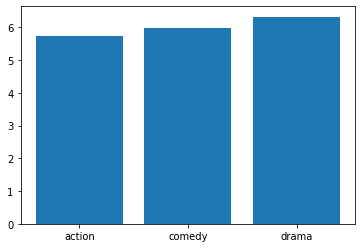

In [38]:
x = ['action', 'comedy', 'drama']
y = [
    
    imdbdatadf[imdbdatadf['genres'].str.contains('Action')]['averagerating'].mean(),
    imdbdatadf[imdbdatadf['genres'].str.contains('Comedy')]['averagerating'].mean(),
    imdbdatadf[imdbdatadf['genres'].str.contains('Drama')]['averagerating'].mean()
]

fig, ax = plt.subplots()
ax.bar(x,y);


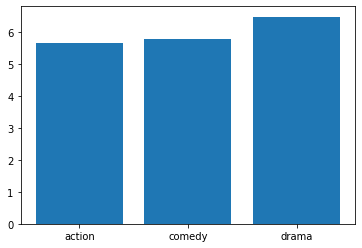

In [39]:
x = ['action', 'comedy', 'drama']
y = [
    
    imdbdatadf[imdbdatadf['genres'] == ('Action')]['averagerating'].mean(),
    imdbdatadf[imdbdatadf['genres'] == ('Comedy')]['averagerating'].mean(),
    imdbdatadf[imdbdatadf['genres'] == ('Drama')]['averagerating'].mean()
]

fig, ax = plt.subplots()
ax.bar(x,y);

What runtime correlates with the best rating?
Do American or foreign films correlate better with rating or run time?


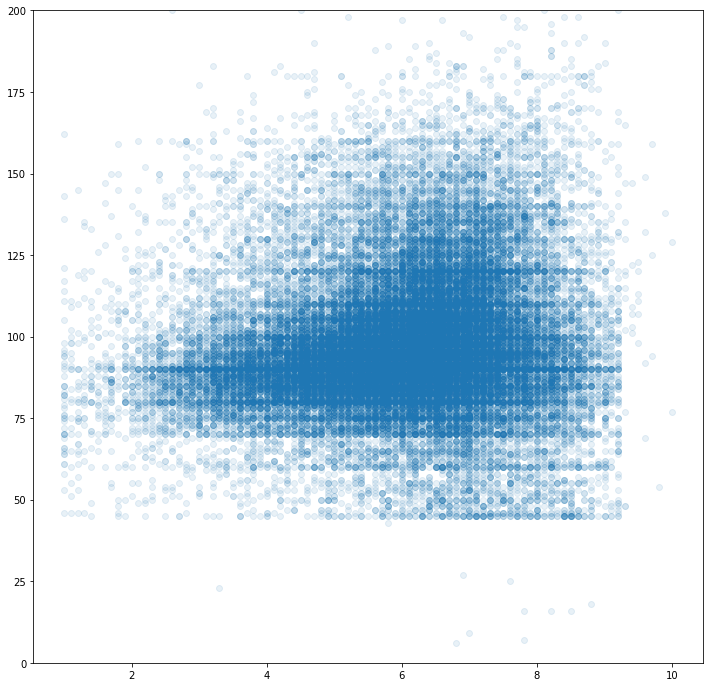

In [40]:
# What runtime correlates with the best rating?
x= imdbdatadf['averagerating']
y= imdbdatadf['runtime_minutes']
fig, ax = plt.subplots(figsize = (12,12))
ax.set_ylim(0, 200)
ax.scatter(x ,y,alpha = 0.1);